In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset with encoding specified as 'latin-1'
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN

In [ ]:
# Assuming the dataset has 'v1' as labels and 'v2' as text
X = df['v2']
y = pd.get_dummies(df['v1'])['spam']

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
# Padding sequences to make them of equal length
max_len = max([len(x) for x in X_train])
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
# Model 1: RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_len))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 181, 64)           509120    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 517441 (1.97 MB)
Trainable params: 517441 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Training RNN
model_rnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
70/70 [==============================] - 5s 44ms/step - loss: 0.3371 - accuracy: 0.8827 - val_loss: 0.1208 - val_accuracy: 0.9623
Epoch 2/5
70/70 [==============================] - 5s 77ms/step - loss: 0.0631 - accuracy: 0.9843 - val_loss: 0.0867 - val_accuracy: 0.9731
Epoch 3/5
70/70 [==============================] - 3s 39ms/step - loss: 0.0249 - accuracy: 0.9948 - val_loss: 0.0655 - val_accuracy: 0.9830
Epoch 4/5
70/70 [==============================] - 3s 41ms/step - loss: 0.0101 - accuracy: 0.9980 - val_loss: 0.0733 - val_accuracy: 0.9785
Epoch 5/5
70/70 [==============================] - 4s 52ms/step - loss: 0.0030 - accuracy: 0.9998 - val_loss: 0.0824 - val_accuracy: 0.9794


In [ ]:
# Evaluating RNN model
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print("RNN Model - Loss: {:.4f}, Accuracy: {:.4f}".format(loss_rnn, accuracy_rnn))

35/35 [==============================] - 0s 8ms/step - loss: 0.0824 - accuracy: 0.9794
RNN Model - Loss: 0.0824, Accuracy: 0.9794


In [ ]:
# Model 2: LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_len))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 121, 64)           509120    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 542209 (2.07 MB)
Trainable params: 542209 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Training LSTM
model_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
70/70 [==============================] - 10s 100ms/step - loss: 0.2631 - accuracy: 0.9195 - val_loss: 0.0915 - val_accuracy: 0.9740
Epoch 2/5
70/70 [==============================] - 8s 114ms/step - loss: 0.0406 - accuracy: 0.9895 - val_loss: 0.0518 - val_accuracy: 0.9848
Epoch 3/5
70/70 [==============================] - 7s 94ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0520 - val_accuracy: 0.9839
Epoch 4/5
70/70 [==============================] - 8s 118ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.0518 - val_accuracy: 0.9857
Epoch 5/5
70/70 [==============================] - 7s 105ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 0.0583 - val_accuracy: 0.9839


In [ ]:
# Evaluating LSTM model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test)
print("LSTM Model - Loss: {:.4f}, Accuracy: {:.4f}".format(loss_lstm, accuracy_lstm))

35/35 [==============================] - 1s 18ms/step - loss: 0.0583 - accuracy: 0.9839
LSTM Model - Loss: 0.0583, Accuracy: 0.9839


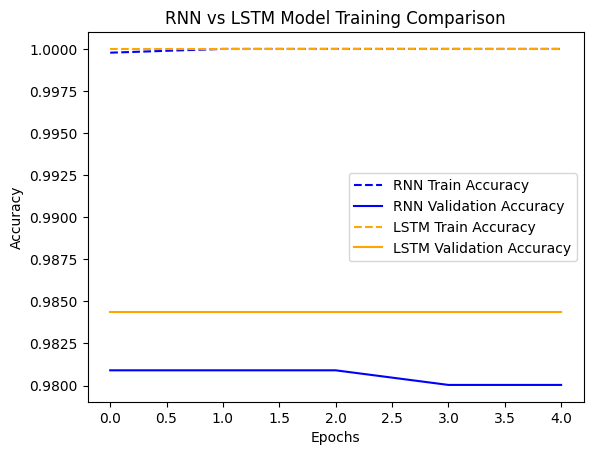

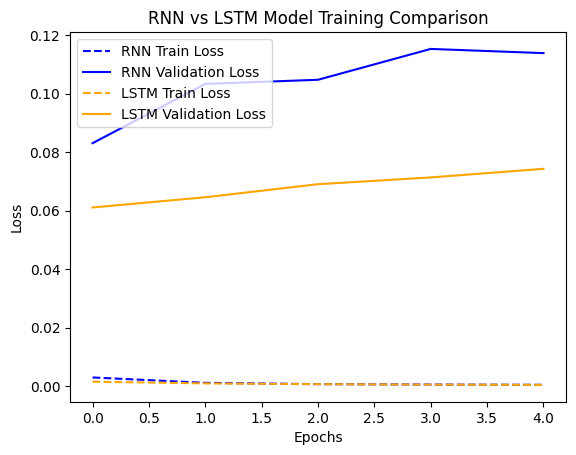

In [ ]:
# Visualizing training comparison
plt.plot(history_rnn.history['accuracy'], label='RNN Train Accuracy', linestyle='--', color='blue')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy', color='blue')
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy', linestyle='--', color='orange')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', color='orange')
plt.title('RNN vs LSTM Model Training Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_rnn.history['loss'], label='RNN Train Loss', linestyle='--', color='blue')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss', color='blue')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss', linestyle='--', color='orange')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='orange')
plt.title('RNN vs LSTM Model Training Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
